## Meaning of each PAS Measure
"Good Job" local        -> Police do a good job in the local area

Contact ward officer    -> Knows how to contact their local SNT/ward officer

Informed local          -> Feels well informed about local police activities over the last 12 months

Listen to concerns      -> Agree the police listen to the concerns of local people

Relied on to be there   -> Agree the police are dealing with the things that matter to this community

Treat everyone fairly   -> Agree the police treat everyone fairly regardless of who they are

Understand issues       -> Agree the police can be relied upon to be there when needed


Trust MPS               -> Does the person who participates in the survey trust the MPS?

# Finding out more about the relative difference between proportion in a burough and total MPS

In [3]:
import pandas as pd

df_pas = pd.read_csv('../data/MOPAC survey/PAS_buroughs.csv', delimiter=';')

#make proportion floats
df_pas['Proportion'] = df_pas['Proportion'].str.replace(',', '.').astype(float)
df_pas['MPS'] = df_pas['MPS'].str.replace(',', '.').astype(float)

df_pas.head()

Date Survey               Borough           Measure  Proportion   MPS
0  31/12/2014    PAS  Barking and Dagenham  "Good Job" local        0.56  0.67
1  31/12/2014    PAS                Barnet  "Good Job" local        0.67  0.67
2  31/12/2014    PAS                Bexley  "Good Job" local        0.72  0.67
3  31/12/2014    PAS                 Brent  "Good Job" local        0.66  0.67
4  31/12/2014    PAS               Bromley  "Good Job" local        0.71  0.67

In [4]:
df_pas['better than MPS (%)'] = ((df_pas['Proportion'] - df_pas['MPS']) / df_pas['MPS']) * 100
df_pas

Date Survey               Borough            Measure  Proportion  \
0     31/12/2014    PAS  Barking and Dagenham   "Good Job" local        0.56   
1     31/12/2014    PAS                Barnet   "Good Job" local        0.67   
2     31/12/2014    PAS                Bexley   "Good Job" local        0.72   
3     31/12/2014    PAS                 Brent   "Good Job" local        0.66   
4     31/12/2014    PAS               Bromley   "Good Job" local        0.71   
...          ...    ...                   ...                ...         ...   
9307  31/12/2023    PAS                Sutton  Understand issues        0.66   
9308  31/12/2023    PAS         Tower Hamlets  Understand issues        0.55   
9309  31/12/2023    PAS        Waltham Forest  Understand issues        0.39   
9310  31/12/2023    PAS            Wandsworth  Understand issues        0.56   
9311  31/12/2023    PAS   City of Westminster  Understand issues        0.67   

       MPS  better than MPS (%)  
0     0.67           -16.417910  
1     0.67             0.000000  
2     0.67             7.462687  
3     0.67            -1.492537  
4     0.67             5.970149  
...    ...                  ...  
9307  0.57            15.789474  
9308  0.57            -3.508772  
9309  0.57           -31.578947  
9310  0.57            -1.754386  
9311  0.57            17.543860  

[9312 rows x 7 columns]

In [5]:
import datetime

df_pas_trust = df_pas[df_pas['Measure'] == 'Trust MPS']
df_pas_trust['Date'] = pd.to_datetime(df_pas_trust['Date'], format='%d/%m/%Y')
df_pas_trust

C:\Users\G2MIC\AppData\Local\Temp\ipykernel_13532\3181056373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pas_trust['Date'] = pd.to_datetime(df_pas_trust['Date'], format='%d/%m/%Y')


Date Survey               Borough    Measure  Proportion   MPS  \
6720 2016-03-31    PAS  Barking and Dagenham  Trust MPS        0.83  0.86   
6721 2016-03-31    PAS                Barnet  Trust MPS        0.87  0.86   
6722 2016-03-31    PAS                Bexley  Trust MPS        0.90  0.86   
6723 2016-03-31    PAS                 Brent  Trust MPS        0.83  0.86   
6724 2016-03-31    PAS               Bromley  Trust MPS        0.88  0.86   
...         ...    ...                   ...        ...         ...   ...   
9275 2023-12-31    PAS                Sutton  Trust MPS        0.76  0.69   
9276 2023-12-31    PAS         Tower Hamlets  Trust MPS        0.72  0.69   
9277 2023-12-31    PAS        Waltham Forest  Trust MPS        0.57  0.69   
9278 2023-12-31    PAS            Wandsworth  Trust MPS        0.69  0.69   
9279 2023-12-31    PAS   City of Westminster  Trust MPS        0.78  0.69   

      better than MPS (%)  
6720            -3.488372  
6721             1.162791  
6722             4.651163  
6723            -3.488372  
6724             2.325581  
...                   ...  
9275            10.144928  
9276             4.347826  
9277           -17.391304  
9278             0.000000  
9279            13.043478  

[1024 rows x 7 columns]

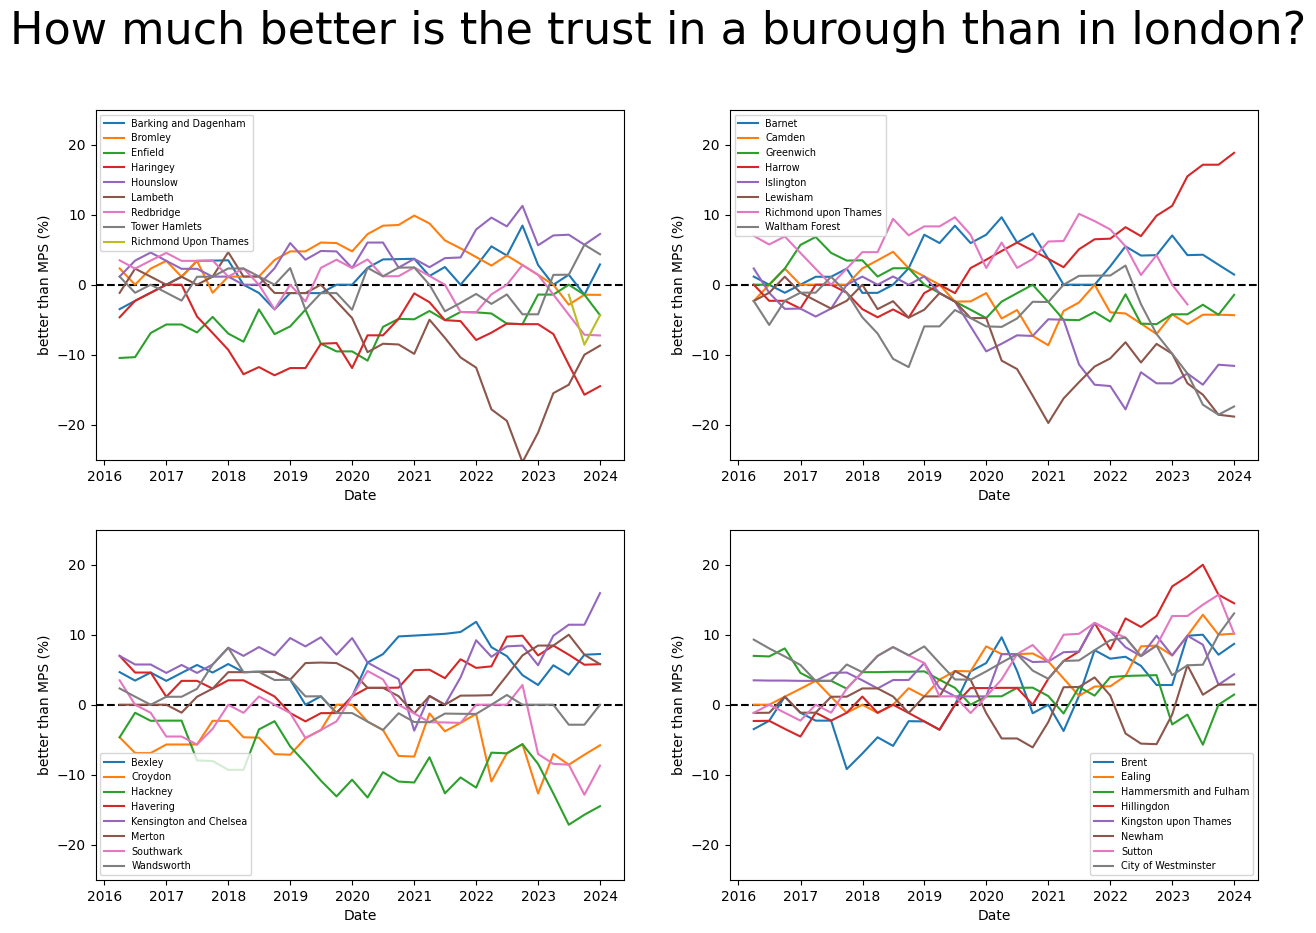

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize=(15, 10))
fig.suptitle('How much better is the trust in a burough than in london?', fontsize=32)

boroughs = df_pas_trust['Borough'].unique()
groups = 4
grouped_boroughs = [boroughs[i::groups] for i in range(groups)]

axis = axs[0,0]

def plot_buroughs(df, axis, boroughs):
    axis.axhline(0, linestyle='--', c='black')
    for borough in boroughs:
        df_borough = df[df['Borough'] == borough]
        axis.plot(df_borough['Date'], df_borough['better than MPS (%)'], label=borough)
    axis.legend(fontsize='x-small')
    axis.set_xlabel('Date')
    axis.set_ylabel('better than MPS (%)')
    axis.set_ylim(-25,25)


plot_buroughs(df_pas_trust, axs[0,0], grouped_boroughs[0])
plot_buroughs(df_pas_trust, axs[0,1], grouped_boroughs[1])
plot_buroughs(df_pas_trust, axs[1,0], grouped_boroughs[2])
plot_buroughs(df_pas_trust, axs[1,1], grouped_boroughs[3])


# burough_group = grouped_boroughs[0]
# for borough in burough_group:
#         df_borough = df_pas_trust[df_pas_trust['Borough'] == borough]
#         axis.plot(df_borough['Date'], df_borough['better than MPS (%)'], label=borough)
# axis.legend(fontsize='x-small')



In [7]:
df_pas.columns

Index(['Date', 'Survey', 'Borough', 'Measure', 'Proportion', 'MPS',
       'better than MPS (%)'],
      dtype='object')

In [8]:
df_pas['Measure'].unique()

array(['"Good Job" local', 'Contact ward officer', 'Informed local',
       'Listen to concerns', 'Relied on to be there',
       'Treat everyone fairly', 'Understand issues', 'Trust MPS'],
      dtype=object)

## Making a simple linear regression to see how each measure impacts the trust

In [9]:
import pandas as pd

# Assuming df_pas is your DataFrame

# Group by 'Date' and 'Borough', and aggregate the proportions for each measure
df_grouped = df_pas.groupby(['Date', 'Borough', 'Measure'])['Proportion'].sum().unstack(fill_value=0)

# Rename columns to include the 'measure' prefix
df_grouped.columns = [f"{measure}_proportion" for measure in df_grouped.columns]

# Reset index to make 'Date' and 'Borough' regular columns
df_grouped.reset_index(inplace=True)

# Display the resulting DataFrame
df_grouped


Date               Borough  "Good Job" local_proportion  \
0     30/06/2015  Barking and Dagenham                         0.61   
1     30/06/2015                Barnet                         0.66   
2     30/06/2015                Bexley                         0.73   
3     30/06/2015                 Brent                         0.62   
4     30/06/2015               Bromley                         0.74   
...          ...                   ...                          ...   
1179  31/12/2023             Southwark                         0.42   
1180  31/12/2023                Sutton                         0.52   
1181  31/12/2023         Tower Hamlets                         0.42   
1182  31/12/2023        Waltham Forest                         0.38   
1183  31/12/2023            Wandsworth                         0.49   

      Contact ward officer_proportion  Informed local_proportion  \
0                                0.29                       0.41   
1                                0.39                       0.44   
2                                0.36                       0.52   
3                                0.41                       0.42   
4                                0.44                       0.54   
...                               ...                        ...   
1179                             0.12                       0.29   
1180                             0.15                       0.37   
1181                             0.09                       0.29   
1182                             0.16                       0.25   
1183                             0.10                       0.33   

      Listen to concerns_proportion  Relied on to be there_proportion  \
0                              0.68                              0.74   
1                              0.73                              0.77   
2                              0.72                              0.81   
3                              0.74                              0.75   
4                              0.76                              0.74   
...                             ...                               ...   
1179                           0.51                              0.54   
1180                           0.66                              0.62   
1181                           0.53                              0.59   
1182                           0.41                              0.49   
1183                           0.56                              0.60   

      Treat everyone fairly_proportion  Trust MPS_proportion  \
0                                 0.76                  0.00   
1                                 0.79                  0.00   
2                                 0.77                  0.00   
3                                 0.73                  0.00   
4                                 0.74                  0.00   
...                                ...                   ...   
1179                              0.50                  0.63   
1180                              0.72                  0.76   
1181                              0.64                  0.72   
1182                              0.54                  0.57   
1183                              0.57                  0.69   

      Understand issues_proportion  
0                             0.69  
1                             0.68  
2                             0.77  
3                             0.72  
4                             0.70  
...                            ...  
1179                          0.49  
1180                          0.66  
1181                          0.55  
1182                          0.39  
1183                          0.56  

[1184 rows x 10 columns]

In [10]:
df_grouped = df_grouped[df_grouped['Trust MPS_proportion'] > 0]
df_grouped

Date               Borough  "Good Job" local_proportion  \
32    30/06/2016  Barking and Dagenham                         0.72   
33    30/06/2016                Barnet                         0.67   
34    30/06/2016                Bexley                         0.74   
35    30/06/2016                 Brent                         0.62   
36    30/06/2016               Bromley                         0.69   
...          ...                   ...                          ...   
1179  31/12/2023             Southwark                         0.42   
1180  31/12/2023                Sutton                         0.52   
1181  31/12/2023         Tower Hamlets                         0.42   
1182  31/12/2023        Waltham Forest                         0.38   
1183  31/12/2023            Wandsworth                         0.49   

      Contact ward officer_proportion  Informed local_proportion  \
32                               0.31                       0.47   
33                               0.38                       0.39   
34                               0.29                       0.50   
35                               0.50                       0.40   
36                               0.23                       0.47   
...                               ...                        ...   
1179                             0.12                       0.29   
1180                             0.15                       0.37   
1181                             0.09                       0.29   
1182                             0.16                       0.25   
1183                             0.10                       0.33   

      Listen to concerns_proportion  Relied on to be there_proportion  \
32                             0.77                              0.76   
33                             0.73                              0.74   
34                             0.77                              0.81   
35                             0.66                              0.71   
36                             0.77                              0.79   
...                             ...                               ...   
1179                           0.51                              0.54   
1180                           0.66                              0.62   
1181                           0.53                              0.59   
1182                           0.41                              0.49   
1183                           0.56                              0.60   

      Treat everyone fairly_proportion  Trust MPS_proportion  \
32                                0.79                  0.85   
33                                0.83                  0.87   
34                                0.83                  0.90   
35                                0.67                  0.85   
36                                0.80                  0.87   
...                                ...                   ...   
1179                              0.50                  0.63   
1180                              0.72                  0.76   
1181                              0.64                  0.72   
1182                              0.54                  0.57   
1183                              0.57                  0.69   

      Understand issues_proportion  
32                            0.74  
33                            0.65  
34                            0.74  
35                            0.62  
36                            0.73  
...                            ...  
1179                          0.49  
1180                          0.66  
1181                          0.55  
1182                          0.39  
1183                          0.56  

[1024 rows x 10 columns]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = df_grouped.drop(['Date', 'Borough', 'Trust MPS_proportion'], axis=1)  # Features (all other measure_proportion columns)
y = df_grouped['Trust MPS_proportion']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0007750649798945252


In [12]:
df_grouped['Predicted_Trust_MPS_proportion'] = model.predict(X)
df_grouped

C:\Users\G2MIC\AppData\Local\Temp\ipykernel_13532\3437795389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped['Predicted_Trust_MPS_proportion'] = model.predict(X)


Date               Borough  "Good Job" local_proportion  \
32    30/06/2016  Barking and Dagenham                         0.72   
33    30/06/2016                Barnet                         0.67   
34    30/06/2016                Bexley                         0.74   
35    30/06/2016                 Brent                         0.62   
36    30/06/2016               Bromley                         0.69   
...          ...                   ...                          ...   
1179  31/12/2023             Southwark                         0.42   
1180  31/12/2023                Sutton                         0.52   
1181  31/12/2023         Tower Hamlets                         0.42   
1182  31/12/2023        Waltham Forest                         0.38   
1183  31/12/2023            Wandsworth                         0.49   

      Contact ward officer_proportion  Informed local_proportion  \
32                               0.31                       0.47   
33                               0.38                       0.39   
34                               0.29                       0.50   
35                               0.50                       0.40   
36                               0.23                       0.47   
...                               ...                        ...   
1179                             0.12                       0.29   
1180                             0.15                       0.37   
1181                             0.09                       0.29   
1182                             0.16                       0.25   
1183                             0.10                       0.33   

      Listen to concerns_proportion  Relied on to be there_proportion  \
32                             0.77                              0.76   
33                             0.73                              0.74   
34                             0.77                              0.81   
35                             0.66                              0.71   
36                             0.77                              0.79   
...                             ...                               ...   
1179                           0.51                              0.54   
1180                           0.66                              0.62   
1181                           0.53                              0.59   
1182                           0.41                              0.49   
1183                           0.56                              0.60   

      Treat everyone fairly_proportion  Trust MPS_proportion  \
32                                0.79                  0.85   
33                                0.83                  0.87   
34                                0.83                  0.90   
35                                0.67                  0.85   
36                                0.80                  0.87   
...                                ...                   ...   
1179                              0.50                  0.63   
1180                              0.72                  0.76   
1181                              0.64                  0.72   
1182                              0.54                  0.57   
1183                              0.57                  0.69   

      Understand issues_proportion  Predicted_Trust_MPS_proportion  
32                            0.74                        0.884872  
33                            0.65                        0.886599  
34                            0.74                        0.919117  
35                            0.62                        0.819817  
36                            0.73                        0.892401  
...                            ...                             ...  
1179                          0.49                        0.660361  
1180                          0.66                        0.774657  
1181                          0.55                        0.715427  
1182  

In [13]:
df_grouped[['Trust MPS_proportion', 'Predicted_Trust_MPS_proportion']]

Trust MPS_proportion  Predicted_Trust_MPS_proportion
32                    0.85                        0.884872
33                    0.87                        0.886599
34                    0.90                        0.919117
35                    0.85                        0.819817
36                    0.87                        0.892401
...                    ...                             ...
1179                  0.63                        0.660361
1180                  0.76                        0.774657
1181                  0.72                        0.715427
1182                  0.57                        0.652531
1183                  0.69                        0.710905

[1024 rows x 2 columns]

In [14]:
# Get the coefficients (weights) of the linear regression model
coefficients = model.coef_

# Get the intercept of the linear regression model
intercept = model.intercept_

# Display the function used for prediction
print("Function used for prediction:")
print("Predicted Trust MPS proportion = ", intercept, end=" ")
for i, col in enumerate(X.columns):
    print("+ (", coefficients[i], "*", col, ")", end=" ")
print()


Function used for prediction:
Predicted Trust MPS proportion =  0.24629450703808653 + ( 0.12172744372504035 * "Good Job" local_proportion ) + ( 0.03569554821913329 * Contact ward officer_proportion ) + ( 0.12162151307787358 * Informed local_proportion ) + ( 0.11010808073466821 * Listen to concerns_proportion ) + ( 0.3111362295446711 * Relied on to be there_proportion ) + ( 0.33295105223978616 * Treat everyone fairly_proportion ) + ( -0.13725897893474903 * Understand issues_proportion ) 


Predicted Trust MPS proportion =  

0.24629450703808653 + 

0.12172744372504035 * "Good Job" local_proportion + 

0.03569554821913329 * Contact ward officer_proportion  + 

0.12162151307787358 * Informed local_proportion  + 

0.11010808073466821 * Listen to concerns_proportion  + 

0.3111362295446711 * Relied on to be there_proportion  + 

0.33295105223978616 * Treat everyone fairly_proportion + 

-0.13725897893474903 * Understand issues_proportion 

### conclusion

For each measure besides "Understand issues" the higher this value is the higer that the predicted trust in the MPS is

# Making the maps for the PAS london

In [15]:
df_pas['year'] = pd.to_datetime(df_pas['Date'], format='%d/%m/%Y').dt.year
df_pas.head()

Date Survey               Borough           Measure  Proportion  \
0  31/12/2014    PAS  Barking and Dagenham  "Good Job" local        0.56   
1  31/12/2014    PAS                Barnet  "Good Job" local        0.67   
2  31/12/2014    PAS                Bexley  "Good Job" local        0.72   
3  31/12/2014    PAS                 Brent  "Good Job" local        0.66   
4  31/12/2014    PAS               Bromley  "Good Job" local        0.71   

    MPS  better than MPS (%)  year  
0  0.67           -16.417910  2014  
1  0.67             0.000000  2014  
2  0.67             7.462687  2014  
3  0.67            -1.492537  2014  
4  0.67             5.970149  2014

In [16]:
#group by year and borough
df_grouped_year = df_pas.groupby(['year', 'Borough', 'Measure'])['Proportion'].mean().unstack(fill_value=0)

df_grouped_year = df_grouped_year[df_grouped_year['Trust MPS'] > 0]
df_grouped_year

Measure                    "Good Job" local  Contact ward officer  \
year Borough                                                        
2016 Barking and Dagenham            0.7325                0.3025   
     Barnet                          0.6650                0.3925   
     Bexley                          0.7425                0.3100   
     Brent                           0.6250                0.4775   
     Bromley                         0.6975                0.2475   
...                                     ...                   ...   
2023 Southwark                       0.4575                0.1425   
     Sutton                          0.5150                0.1525   
     Tower Hamlets                   0.4450                0.1025   
     Waltham Forest                  0.3775                0.1725   
     Wandsworth                      0.5000                0.1025   

Measure                    Informed local  Listen to concerns  \
year Borough                                                    
2016 Barking and Dagenham          0.4475              0.7675   
     Barnet                        0.3900              0.7250   
     Bexley                        0.5075              0.7850   
     Brent                         0.3775              0.6625   
     Bromley                       0.5025              0.7800   
...                                   ...                 ...   
2023 Southwark                     0.2725              0.4975   
     Sutton                        0.3600              0.6775   
     Tower Hamlets                 0.2900              0.5425   
     Waltham Forest                0.2700              0.4525   
     Wandsworth                    0.2925              0.5350   

Measure                    Relied on to be there  Treat everyone fairly  \
year Borough                                                              
2016 Barking and Dagenham                 0.7750                 0.7925   
     Barnet                               0.7425                 0.8450   
     Bexley                               0.8100                 0.8250   
     Brent                                0.7100                 0.6800   
     Bromley                              0.7800                 0.8175   
...                                          ...                    ...   
2023 Southwark                            0.5500                 0.5100   
     Sutton                               0.6450                 0.7350   
     Tower Hamlets                        0.5675                 0.6300   
     Waltham Forest                       0.5075                 0.5250   
     Wandsworth                           0.5725                 0.5825   

Measure                    Trust MPS  Understand issues  
year Borough                                             
2016 Barking and Dagenham     0.8550             0.7475  
     Barnet                   0.8700             0.6575  
     Bexley                   0.9050             0.7575  
     Brent                    0.8575             0.6325  
     Bromley                  0.8875             0.7475  
...                              ...                ...  
2023 Southwark                0.6325             0.4850  
     Sutton                   0.7925             0.6800  
     Tower Hamlets            0.7225             0.5550  
     Waltham Forest           0.5850             0.4300  
     Wandsworth               0.6900             0.5625  

[257 rows x 8 columns]

In [17]:
df_grouped_year_2023 = df_grouped_year[df_grouped_year.index.get_level_values('year') == 2023]
df_grouped_year_2023 = df_grouped_year_2023[['Trust MPS']]
df_grouped_year_2023.reset_index(inplace=True)
df_grouped_year_2023 = df_grouped_year_2023.rename(columns={'Trust MPS': 'Trust_MPS_2023'})
df_grouped_year_2023 = df_grouped_year_2023.drop(columns=['year'])
df_grouped_year_2023.set_index('Borough', inplace=True)
df_grouped_year_2023

Measure                 Trust_MPS_2023
Borough                               
Barking and Dagenham          0.705000
Barnet                        0.722500
Bexley                        0.742500
Brent                         0.762500
Bromley                       0.690000
Camden                        0.667500
City of Westminster           0.760000
Croydon                       0.650000
Ealing                        0.775000
Enfield                       0.687500
Greenwich                     0.677500
Hackney                       0.595000
Hammersmith and Fulham        0.690000
Haringey                      0.615000
Harrow                        0.820000
Havering                      0.747500
Hillingdon                    0.820000
Hounslow                      0.747500
Islington                     0.612500
Kensington and Chelsea        0.785000
Kingston upon Thames          0.745000
Lambeth                       0.615000
Lewisham                      0.582500
Merton                        0.755000
Newham                        0.722500
Redbridge                     0.665000
Richmond Upon Thames          0.663333
Richmond upon Thames          0.690000
Southwark                     0.632500
Sutton                        0.792500
Tower Hamlets                 0.722500
Waltham Forest                0.585000
Wandsworth                    0.690000

In [18]:
# import geopandas as gpd

# geopackage_path = 'London_Boroughs.gpkg'

# # List all layers in the GeoPackage file
# layers = gpd.io.file.fiona.listlayers(geopackage_path)
# print("Available layers:", layers)

In [19]:
import geopandas as gpd

# Path to the GeoPackage file (update with the actual path on your system)
geopackage_path = '../data/MOPAC survey/London_Boroughs.gpkg'
layer_name = 'london_boroughs'  # Update with the actual layer name

# Load the GeoPackage file
boroughs = gpd.read_file(geopackage_path, layer=layer_name)
print("Boroughs GeoDataFrame:")
boroughs.head(1)

Boroughs GeoDataFrame:


objectid                  name   gss_code  hectares  nonld_area ons_inner  \
0         1  Kingston upon Thames  E09000021  3726.117         0.0         F   

  sub_2011                                           geometry  
0    South  POLYGON ((516401.600 160201.800, 516407.300 16...

In [20]:
# rename the borough Westminster to City of Westminster
boroughs.loc[boroughs['name'] == 'Westminster', 'name'] = 'City of Westminster'
boroughs

objectid                    name   gss_code   hectares  nonld_area  \
0          1    Kingston upon Thames  E09000021   3726.117       0.000   
1          2                 Croydon  E09000008   8649.441       0.000   
2          3                 Bromley  E09000006  15013.487       0.000   
3          4                Hounslow  E09000018   5658.541      60.755   
4          5                  Ealing  E09000009   5554.428       0.000   
5          6                Havering  E09000016  11445.735     210.763   
6          7              Hillingdon  E09000017  11570.063       0.000   
7          8                  Harrow  E09000015   5046.330       0.000   
8          9                   Brent  E09000005   4323.270       0.000   
9         10                  Barnet  E09000003   8674.837       0.000   
10        11                Lewisham  E09000023   3531.706      16.795   
11        12               Greenwich  E09000011   5044.190     310.785   
12        13                  Bexley  E09000004   6428.649     370.619   
13        14                 Enfield  E09000010   8220.025       0.000   
14        15          Waltham Forest  E09000031   3880.793       0.000   
15        16                 Lambeth  E09000022   2724.940      43.927   
16        17               Redbridge  E09000026   5644.225       2.300   
17        18                  Sutton  E09000029   4384.698       0.000   
18        20    Richmond upon Thames  E09000027   5876.111     135.443   
19        21                  Merton  E09000024   3762.466       0.000   
20        22              Wandsworth  E09000032   3522.022      95.600   
21        23  Hammersmith and Fulham  E09000013   1715.409      75.648   
22        19               Southwark  E09000028   2991.340     105.139   
23        24  Kensington and Chelsea  E09000020   1238.379      25.994   
24        25          City of London  E09000001    314.942      24.546   
25        26     City of Westminster  E09000033   2203.005      54.308   
26        27                  Camden  E09000007   2178.932       0.000   
27        28           Tower Hamlets  E09000030   2157.501     178.867   
28        29               Islington  E09000019   1485.664       0.000   
29        30                 Hackney  E09000012   1904.902       0.000   
30        31                Haringey  E09000014   2959.837       0.000   
31        32                  Newham  E09000025   3857.806     237.637   
32        33    Barking and Dagenham  E09000002   3779.934     169.150   

   ons_inner sub_2011                                           geometry  
0          F    South  POLYGON ((516401.600 160201.800, 516407.300 16...  
1          F    South  POLYGON ((535009.200 159504.700, 535005.500 15...  
2          F    South  POLYGON ((540373.600 157530.400, 540361.200 15...  
3          F     West  POLYGON ((509703.400 175356.600, 509712.600 17...  
4          F     West  POLYGON ((515647.200 178787.800, 515608.800 17...  
5          F     East  POLYGON ((553564.000 179127.100, 553558.800 17...  
6          F     West  POLYGON ((507187.700 174163.700, 507160.800 17...  
7          F     West  POLYGON ((515767.200 186062.800, 515761.000 18...  
8          F     West  POLYGON ((515767.200 186062.800, 515860.000 18...  
9          F    North  POLYGON ((517435.200 194421.100, 517437.400 19...  
10         T     East  POLYGON ((535843.800 174919.500, 535847.300 17...  
11         F     East  POLYGON ((538102.400 176312.700, 538078.800 17...  
12         F     East  POLYGON ((547448.000 170380.300, 547429.200 17...  
13         F    North  POLYGON ((531023.500 200933.600, 531039.900 20...  
14         F     East  POLYGON ((539923.100 191863.100, 539928.100 19...  
15         T  Central  POLYGON ((533716.600 170817.800, 533715.400 17...  
16         F     East  POLYGON ((539923.100 191863.100, 539922.800 19...  
17         F    South  POLYGON ((528552.300 159658.100, 528399.700 15...  
18         F    South  POLYGON ((514743.800 168957.200, 514719

In [21]:
boroughs = boroughs.set_index('name')
boroughs.head(1)

objectid   gss_code  hectares  nonld_area ons_inner  \
name                                                                        
Kingston upon Thames         1  E09000021  3726.117         0.0         F   

                     sub_2011  \
name                            
Kingston upon Thames    South   

                                                               geometry  
name                                                                     
Kingston upon Thames  POLYGON ((516401.600 160201.800, 516407.300 16...

In [22]:
#check if we are missing a borough
unique_boroughs = df_grouped_year.index.get_level_values('Borough').unique()

unique_2023_boroughs = df_grouped_year_2023.index.unique()

for borough in unique_boroughs:
    if borough not in unique_2023_boroughs:
        print(borough)

In [23]:
unique_2023_boroughs

Index(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of Westminster', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond Upon Thames',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth'],
      dtype='object', name='Borough')

In [24]:
merged = boroughs.join(df_grouped_year_2023)
merged.reset_index(inplace=True)
merged

name  objectid   gss_code   hectares  nonld_area  \
0     Kingston upon Thames         1  E09000021   3726.117       0.000   
1                  Croydon         2  E09000008   8649.441       0.000   
2                  Bromley         3  E09000006  15013.487       0.000   
3                 Hounslow         4  E09000018   5658.541      60.755   
4                   Ealing         5  E09000009   5554.428       0.000   
5                 Havering         6  E09000016  11445.735     210.763   
6               Hillingdon         7  E09000017  11570.063       0.000   
7                   Harrow         8  E09000015   5046.330       0.000   
8                    Brent         9  E09000005   4323.270       0.000   
9                   Barnet        10  E09000003   8674.837       0.000   
10                Lewisham        11  E09000023   3531.706      16.795   
11               Greenwich        12  E09000011   5044.190     310.785   
12                  Bexley        13  E09000004   6428.649     370.619   
13                 Enfield        14  E09000010   8220.025       0.000   
14          Waltham Forest        15  E09000031   3880.793       0.000   
15                 Lambeth        16  E09000022   2724.940      43.927   
16               Redbridge        17  E09000026   5644.225       2.300   
17                  Sutton        18  E09000029   4384.698       0.000   
18    Richmond upon Thames        20  E09000027   5876.111     135.443   
19                  Merton        21  E09000024   3762.466       0.000   
20              Wandsworth        22  E09000032   3522.022      95.600   
21  Hammersmith and Fulham        23  E09000013   1715.409      75.648   
22               Southwark        19  E09000028   2991.340     105.139   
23  Kensington and Chelsea        24  E09000020   1238.379      25.994   
24          City of London        25  E09000001    314.942      24.546   
25     City of Westminster        26  E09000033   2203.005      54.308   
26                  Camden        27  E09000007   2178.932       0.000   
27           Tower Hamlets        28  E09000030   2157.501     178.867   
28               Islington        29  E09000019   1485.664       0.000   
29                 Hackney        30  E09000012   1904.902       0.000   
30                Haringey        31  E09000014   2959.837       0.000   
31                  Newham        32  E09000025   3857.806     237.637   
32    Barking and Dagenham        33  E09000002   3779.934     169.150   

   ons_inner sub_2011                                           geometry  \
0          F    South  POLYGON ((516401.600 160201.800, 516407.300 16...   
1          F    South  POLYGON ((535009.200 159504.700, 535005.500 15...   
2          F    South  POLYGON ((540373.600 157530.400, 540361.200 15...   
3          F     West  POLYGON ((509703.400 175356.600, 509712.600 17...   
4          F     West  POLYGON ((515647.200 178787.800, 515608.800 17...   
5          F     East  POLYGON ((553564.000 179127.100, 553558.800 17...   
6          F     West  POLYGON ((507187.700 174163.700, 507160.800 17...   
7          F     West  POLYGON ((515767.200 186062.800, 515761.000 18...   
8          F     West  POLYGON ((515767.200 186062.800, 515860.000 18...   
9          F    North  POLYGON ((517435.200 194421.100, 517437.400 19...   
10         T     East  POLYGON ((535843.800 174919.500, 535847.300 17...   
11         F     East  POLYGON ((538102.400 176312.700, 538078.800 17...   
12         F     East  POLYGON ((547448.000 170380.300, 547429.200 17...   
13         F    North  POLYGON ((531023.500 200933.600, 531039.900 20...   
14         F     East  POLYGON ((539923.100 191863.100, 539928.100 19...   
15         T  Central  POLYGON ((533716.600 170817.800, 533715.400 17...   
16         F     East  POLYGON ((539923.100 191863.100, 539922.800 19...   
17         F    South  POLYGON ((528552.300 159658.100, 528399.700 15...   
18         F    South  POLYGON ((514743.800 168957.200, 51471

In [25]:
import folium
import branca.colormap as cm

# Merge the data with the GeoDataFrame
merged = boroughs.join(df_grouped_year_2023)
merged.reset_index(inplace=True)

# Initialize the map centered around London
m = folium.Map(location=[51.509865, -0.118092], zoom_start=10)


# Add the choropleth layer
folium.Choropleth(
    geo_data=merged,
    data=merged,
    columns=['name', 'Trust_MPS_2023'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Trust MPS 2023'
).add_to(m)

from IPython.display import IFrame

# Save the map to an HTML file
m

In [26]:
import folium
import branca.colormap as cm
from folium.features import GeoJson, GeoJsonTooltip

# Merge the data with the GeoDataFrame
merged = boroughs.join(df_grouped_year_2023)
merged.reset_index(inplace=True)

# Initialize the map centered around London
m = folium.Map(location=[51.509865, -0.118092], zoom_start=10)

# Add the choropleth layer
choropleth = folium.Choropleth(
    geo_data=merged,
    data=merged,
    columns=['name', 'Trust_MPS_2023'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Trust MPS 2023'
).add_to(m)

# Add GeoJson layer with borough names and Trust_MPS_2023 values
folium.GeoJson(
    merged,
    style_function=lambda feature: {
        'fillColor': 'transparent',
        'color': 'black',
        'weight': 0.5,
    },
    tooltip=GeoJsonTooltip(
        fields=['name', 'Trust_MPS_2023'],
        aliases=['Borough', 'Trust MPS 2023'],
        localize=True
    )
).add_to(m)

# Display the map
m

In [27]:
df_grouped_year.reset_index(inplace=True)
unique_years = df_grouped_year['year'].unique().tolist()
unique_years

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [28]:
from folium.features import GeoJson, GeoJsonTooltip

for year in unique_years:
    df_grouped_year_year = df_grouped_year[df_grouped_year['year'] == year]
    df_grouped_year_year = df_grouped_year_year[['Borough', 'Trust MPS']]
    df_grouped_year_year = df_grouped_year_year.rename(columns={'Trust MPS': 'Trust_MPS'})
    df_grouped_year_year.set_index('Borough', inplace=True)

    merged = boroughs.join(df_grouped_year_year)
    merged.reset_index(inplace=True)
    
    m = folium.Map(location=[51.509865, -0.118092], zoom_start=10)
    
    folium.Choropleth(
        geo_data=merged,
        data=merged,
        columns=['name', 'Trust_MPS'],
        key_on='feature.properties.name',
        fill_color='YlGnBu',
        fill_opacity=0.9,
        line_opacity=0.5,
        legend_name=f'Trust MPS {year}'
    ).add_to(m)

    # Add GeoJson layer with borough names and Trust_MPS_2023 values
    folium.GeoJson(
        merged,
        style_function=lambda feature: {
            'fillColor': 'transparent',
            'color': 'black',
            'weight': 0.5,
        },
        tooltip=GeoJsonTooltip(
            fields=['name', 'Trust_MPS'],
            aliases=['Borough', 'Trust MPS'],
            localize=True
        )
    ).add_to(m)
    
    m.save(f"map_{year}.html")

In [29]:
#group by year and borough
df_pas['Borough'] = df_pas['Borough'].str.lower()

df_best_worst_borough = df_pas.groupby(['Borough', 'Measure'])['Proportion'].mean().unstack(fill_value=0)

df_best_worst_borough = df_best_worst_borough[df_best_worst_borough['Trust MPS'] > 0]
df_best_worst_borough

Measure                 "Good Job" local  Contact ward officer  \
Borough                                                          
barking and dagenham            0.575405              0.213514   
barnet                          0.597297              0.250541   
bexley                          0.638378              0.276486   
brent                           0.581892              0.248919   
bromley                         0.646486              0.254324   
camden                          0.580000              0.270000   
city of westminster             0.678108              0.178108   
croydon                         0.522973              0.208649   
ealing                          0.599459              0.247297   
enfield                         0.516757              0.267568   
greenwich                       0.607568              0.247027   
hackney                         0.526757              0.269459   
hammersmith and fulham          0.663784              0.200541   
haringey                        0.527838              0.308378   
harrow                          0.592973              0.258919   
havering                        0.628649              0.245946   
hillingdon                      0.596216              0.299189   
hounslow                        0.611622              0.241622   
islington                       0.564054              0.260270   
kensington and chelsea          0.717568              0.196216   
kingston upon thames            0.679459              0.281622   
lambeth                         0.572973              0.211081   
lewisham                        0.565946              0.229189   
merton                          0.635135              0.236486   
newham                          0.573514              0.204865   
redbridge                       0.572703              0.254324   
richmond upon thames            0.687838              0.252432   
southwark                       0.622973              0.223514   
sutton                          0.662162              0.259189   
tower hamlets                   0.554324              0.202973   
waltham forest                  0.549459              0.238919   
wandsworth                      0.635676              0.175405   

Measure                 Informed local  Listen to concerns  \
Borough                                                      
barking and dagenham          0.396216            0.678108   
barnet                        0.391081            0.710270   
bexley                        0.461622            0.717568   
brent                         0.384595            0.688919   
bromley                       0.446216            0.697838   
camden                        0.384054            0.690000   
city of westminster           0.409459            0.757027   
croydon                       0.393243            0.633784   
ealing                        0.427838            0.697568   
enfield                       0.350811            0.611892   
greenwich                     0.389730            0.702432   
hackney                       0.328649            0.643784   
hammersmith and fulham        0.398649            0.714865   
haringey                      0.390811            0.661081   
harrow                        0.385676            0.681892   
havering                      0.418919            0.701081   
hillingdon                    0.428378            0.672432   
hounslow                      0.471351            0.680000   
islington                     0.357838            0.674865   
kensington and chelsea        0.422973            0.774054   
kingston upon thames          0.455946            0.708378   
lambeth                       0.359459            0.637568   
lewisham                      0.333243            0.632973   
merton                        0.429459            0.695946   
newham                        0.390541            0.707297   
redbridge                     0.394324            0.688919   
richmond upon thame

In [30]:
df_best_worst_borough = df_best_worst_borough[['Trust MPS']]

# find the top 5 boroughs
df_best_borough = df_best_worst_borough.sort_values(by=['Trust MPS'])

# find the bottom 5 boroughs
df_best_borough

Measure                 Trust MPS
Borough                          
hackney                  0.737812
lewisham                 0.745000
haringey                 0.748437
islington                0.756250
lambeth                  0.759375
enfield                  0.759687
croydon                  0.765000
waltham forest           0.765625
southwark                0.789687
camden                   0.790937
greenwich                0.799063
tower hamlets            0.805937
newham                   0.806562
redbridge                0.811250
wandsworth               0.811562
brent                    0.815000
barking and dagenham     0.815625
hammersmith and fulham   0.828438
barnet                   0.831562
merton                   0.832500
harrow                   0.833437
bromley                  0.834063
havering                 0.836250
hillingdon               0.838125
ealing                   0.839688
hounslow                 0.840625
richmond upon thames     0.841875
kingston upon thames     0.848750
bexley                   0.850313
sutton                   0.851562
city of westminster      0.858750
kensington and chelsea   0.860000

In [31]:
import pandas as pd

df_pas = pd.read_csv('../data/MOPAC survey/PAS_buroughs.csv', delimiter=';')

df_pas['Borough'] = df_pas['Borough'].str.lower()
df_pas['Proportion'] = df_pas['Proportion'].str.replace(',', '.').astype(float)
df_pas['MPS'] = df_pas['MPS'].str.replace(',', '.').astype(float)

df_best_worst_borough = df_pas.groupby(['Borough', 'Measure'])['Proportion'].mean().unstack(fill_value=0)

df_best_worst_borough = df_best_worst_borough[df_best_worst_borough['Trust MPS'] > 0]

df_best_worst_borough = df_best_worst_borough[['Trust MPS']]

# find the top 5 boroughs
df_best_borough = df_best_worst_borough.sort_values(by=['Trust MPS'])

# find the bottom 5 boroughs
df_best_borough

Measure                 Trust MPS
Borough                          
hackney                  0.737812
lewisham                 0.745000
haringey                 0.748437
islington                0.756250
lambeth                  0.759375
enfield                  0.759687
croydon                  0.765000
waltham forest           0.765625
southwark                0.789687
camden                   0.790937
greenwich                0.799063
tower hamlets            0.805937
newham                   0.806562
redbridge                0.811250
wandsworth               0.811562
brent                    0.815000
barking and dagenham     0.815625
hammersmith and fulham   0.828438
barnet                   0.831562
merton                   0.832500
harrow                   0.833437
bromley                  0.834063
havering                 0.836250
hillingdon               0.838125
ealing                   0.839688
hounslow                 0.840625
richmond upon thames     0.841875
kingston upon thames     0.848750
bexley                   0.850313
sutton                   0.851562
city of westminster      0.858750
kensington and chelsea   0.860000